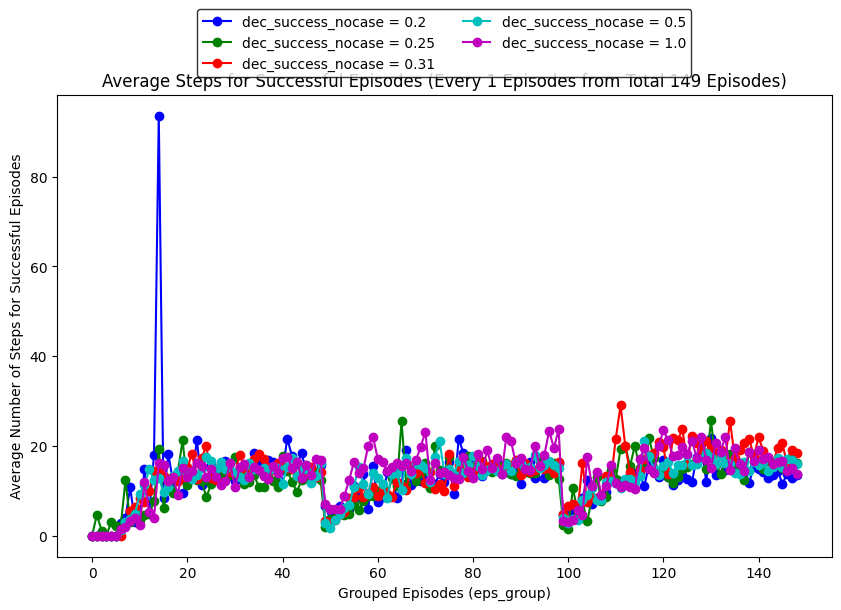

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Folder path containing CSV files in the current directory
folder_path = './dsuc-t01_dun05/'

# Variable to control how many episodes to average together
episodes_per_average = 10

# Initialize an empty list to hold data from all files
all_data_frames = []

# Loop through all CSV files in the specified folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        # Load the data from the CSV file and append to the list
        df = pd.read_csv(file_path)
        df['filename'] = filename  # Add a filename column to keep track of source
        all_data_frames.append(df)

# If no CSV files are found, exit without generating the graph
if len(all_data_frames) == 0:
    print("No CSV files found in the specified folder.")
else:
    # Concatenate all data frames into a single data frame
    combined_data = pd.concat(all_data_frames, ignore_index=True)

    # Set total steps to 0 for non-successful episodes
    combined_data.loc[combined_data['eps_status'] == 0, 'total_steps'] = 0

    # Create a new column for grouping episodes in batches
    combined_data['eps_group'] = (combined_data['eps'] // episodes_per_average) * episodes_per_average

    # Group by 'eps_group' and 'dec_success_nocase', then calculate the average values for numeric columns only
    grouped_data = combined_data.groupby(['eps_group', 'dec_success_nocase']).mean(numeric_only=True).reset_index()

    # Find unique values of 'dec_success_nocase' for consistent coloring
    unique_dec_success_nocase_values = sorted(grouped_data['dec_success_nocase'].unique())

    # Define a consistent color mapping for each `dec_success_nocase` value
    color_mapping = {dec_value: color for dec_value, color in zip(unique_dec_success_nocase_values, ['b', 'g', 'r', 'c', 'm', 'y', 'k'])}

    # Plot: Average Steps for Successful Episodes Across All Episodes
    plt.figure(figsize=(10, 6))

    # Plot the average number of steps for each `dec_success_nocase` value using consistent colors
    for dec_value in unique_dec_success_nocase_values:
        # Filter the data for the current `dec_success_nocase` value
        data_filtered = grouped_data[grouped_data['dec_success_nocase'] == dec_value]
        # Plot the line for the current `dec_success_nocase` value using consistent colors
        plt.plot(data_filtered['eps_group'], data_filtered['total_steps'], 
                 label=f'dec_success_nocase = {dec_value}', color=color_mapping[dec_value], marker='o')

    # Set chart title and labels
    total_episodes = combined_data['eps'].nunique()
    plt.title(f"Average Steps for Successful Episodes (Every {episodes_per_average} Episodes from Total {total_episodes} Episodes)")
    plt.xlabel('Grouped Episodes (eps_group)')
    plt.ylabel('Average Number of Steps for Successful Episodes')

    # Place the legend above the plot area without overlapping, with a border
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2, frameon=True, edgecolor='black')

    # Show the plot
    plt.show()
